In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [9]:
df_train=pd.read_csv('haberman.csv',names=['Age','Op_Year','axil_nodes','Surv_status'])
df_train.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [38]:
df_train.info()
#there are no null values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### we can see that the data is imbalanced

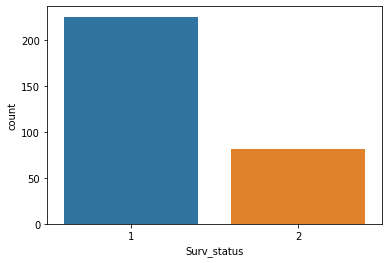

In [15]:
Y=df_train
ax=sns.countplot(x="Surv_status", data=Y)

### There is a high chance that the people with more age tend to die soon so let's check that.

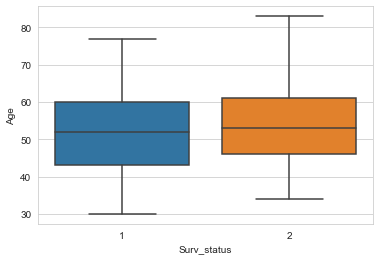

In [40]:
sns.boxplot(y="Age",x='Surv_status',data=df_train)
plt.show()

### Their is no much difference but still number of people that die at a higher are are slightly high.

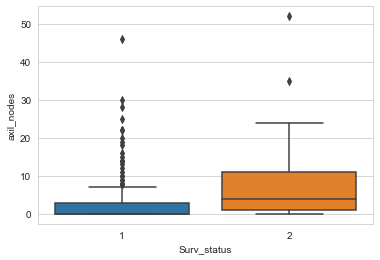

In [41]:
sns.boxplot(y="axil_nodes",x='Surv_status',data=df_train)
plt.show()

### Almost 80% of the patients have less than or equal to 5 positive axil nodea. 
### If the axil nodes are low then chance of living is high 

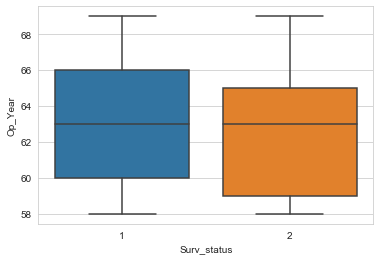

In [42]:
sns.boxplot(y="Op_Year",x='Surv_status',data=df_train)
plt.show()

### The chance of living more than 5 years if the operation if done at the years (1960-1966).

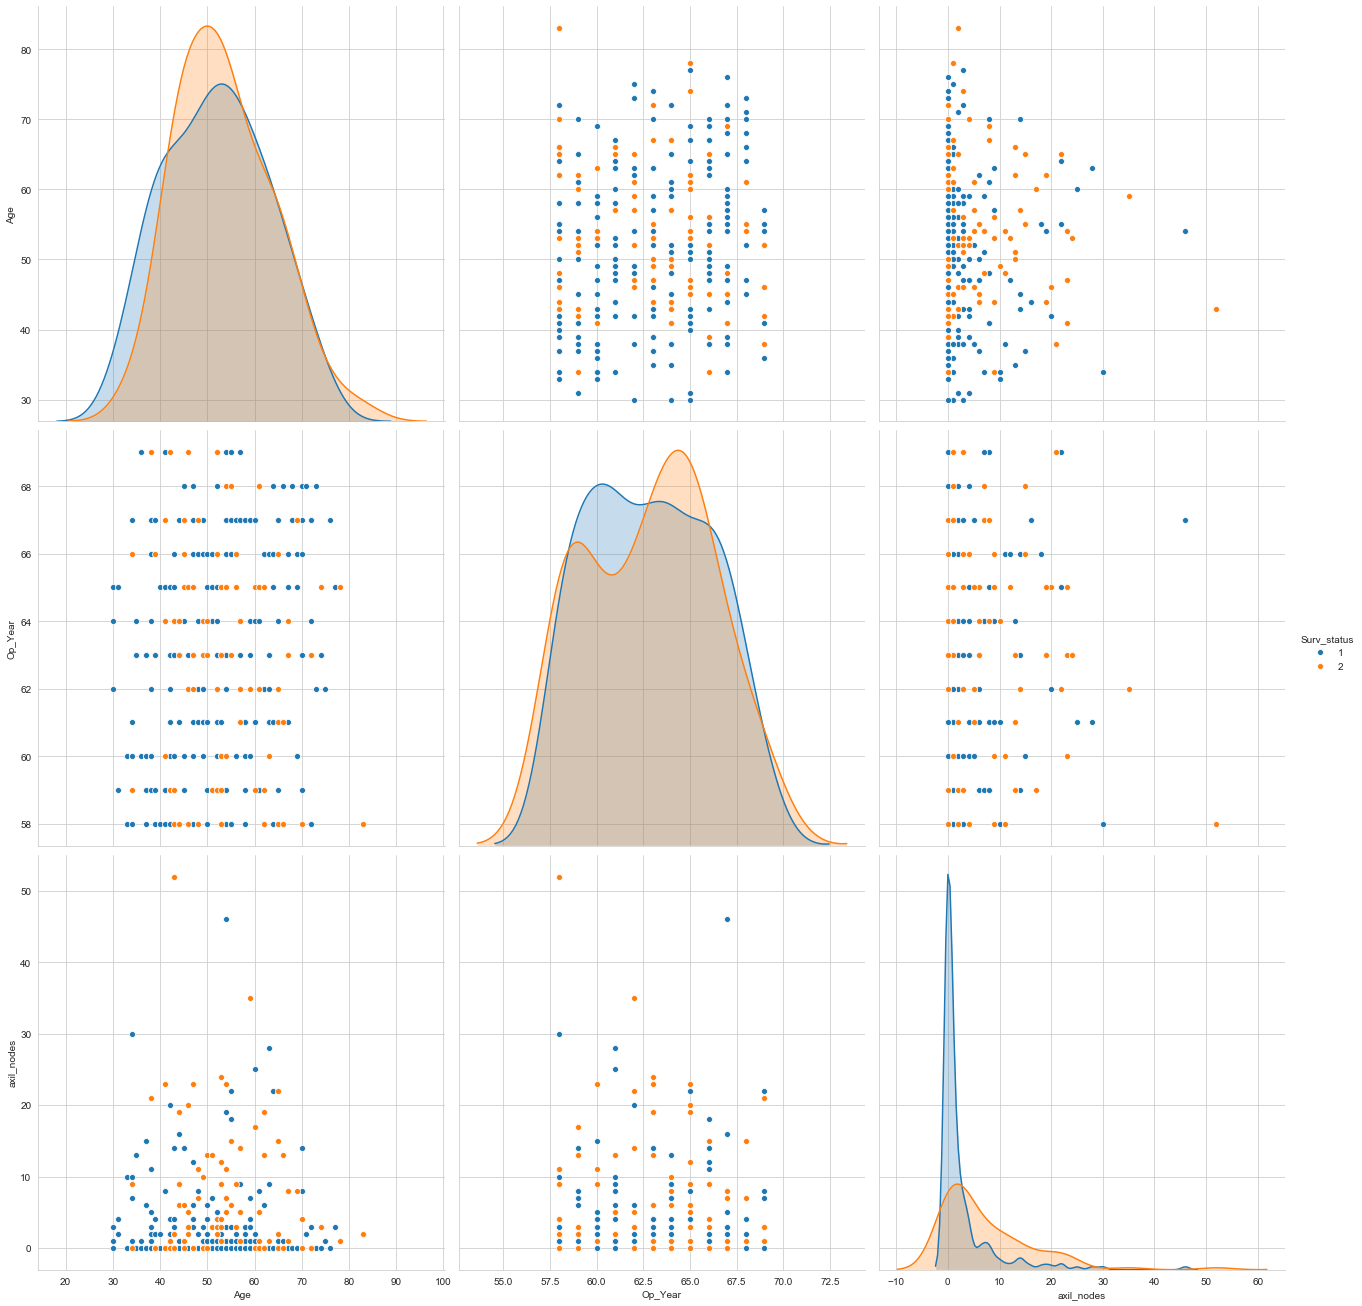

In [43]:
sns.pairplot(df_train, hue='Surv_status', size=6)
plt.show()

### There is a nice seperation between two cateogeries when plotte between year of operation and axil nodes 

# t-SNE model

In [50]:
df_x=df_train.drop('Surv_status',axis=1)
df_y=df_train[['Surv_status']]

In [69]:
model = TSNE()
model.n_components=2
model.n_iter=100000
model.perplexity=35
model.learning_rate=10
df=model.fit_transform(df_x)
df=pd.DataFrame(df,columns=["feature1","feature2"])
df['Surv_status']=df_y
print(df)

     feature1   feature2  Surv_status
0    5.833264  17.821310            1
1    5.948973  18.312443            1
2    5.603237  17.549805            1
3    5.270255  18.999882            1
4    6.230560  17.029783            1
..        ...        ...          ...
301 -2.269068 -18.280796            1
302 -0.393955 -17.896744            1
303 -0.997514 -18.386246            1
304 -1.208224 -18.702072            2
305 -2.102281 -19.501705            2

[306 rows x 3 columns]


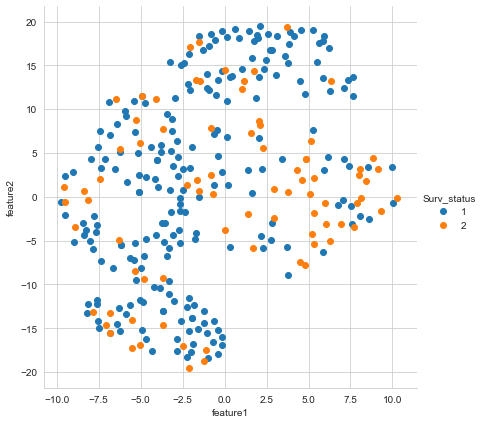

In [70]:
sns.FacetGrid(df, hue='Surv_status', height=6).map(plt.scatter,"feature1","feature2").add_legend()
plt.show()

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y, test_size=0.5, random_state=42)

In [222]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state=0)

In [223]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [224]:
model.score(x_test,y_test)

0.7908496732026143

In [226]:
model.feature_importances_

array([0.34791003, 0.254002  , 0.39808797])

In [248]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [249]:
model.score(x_test,y_test)

0.7777777777777778

In [250]:
from sklearn.linear_model import LogisticRegression
modwel=LogisticRegression()
modwel.max_iter=100000000000
modwel.fit(x_train,y_train.values.ravel())
y=modwel.score(x_test,y_test)
print(y)

0.7777777777777778
